Baseline results for QASC two-step retrieval

In [22]:
import json

file_path = '../data/dev.jsonl'

with open(file_path) as f:
    data = [json.loads(l) for l in f]

data[0]

{'id': '3NGI5ARFTT4HNGVWXAMLNBMFA0U1PG',
 'question': {'stem': 'Climate is generally described in terms of what?',
  'choices': [{'text': 'sand',
    'label': 'A',
    'facts': [{'text': 'Climate is generally described in terms of temperature and moisture.',
      'score': 31.762531},
     {'text': 'Picture Clarity Clarity is generally described in terms of resolution.',
      'score': 23.960697},
     {'text': 'Sand looks vague.', 'score': 23.72034},
     {'text': 'Community climate generally supports what is occurring.',
      'score': 22.979856},
     {'text': 'What To Bring The climate in Corvallis is generally mild.',
      'score': 22.13386},
     {'text': 'XML describes the content in terms of what data is being described.',
      'score': 21.65781},
     {'text': 'Size of smaller properties are generally described in terms of square meters.',
      'score': 21.368364},
     {'text': 'XML describes the content in terms of what the data is that is being described.',
      'score'

In [23]:
from enum import Enum


class RecallType(Enum):
    Not = 0
    Partial = 1
    Total = 2

def contains_at_k(instance, k):
    # Get the correct choice
    key = instance['answerKey']
    choices = {c['label']:c['facts'] for c in instance['question']['choices']}
    correct_choice = choices[key]
    phrases = [f['text'] for f in correct_choice]

    top_k = phrases[:k]
    gt = {instance['fact1'], instance['fact2']}

    counter = 0

    for phrase in gt:
        if phrase in top_k:
            counter += 1

    kind = RecallType(counter)

    return kind

In [24]:
def recall_at_k(data, k):
    partial, total = 0., 0.
    for instance in data:
        kind = contains_at_k(instance, k)
        if kind == RecallType.Partial:
            partial += 1
        elif kind == RecallType.Total:
            total += 1
            partial += 1

    return partial / len(data), total / len(data)

In [25]:
# Example run
partial, total = recall_at_k(data, 10)
print(partial, total)

0.6382289416846653 0.21922246220302377


In [26]:
from tqdm import tqdm

support = list(range(10, 110, 10))
partial, total = list(), list()
for k in tqdm(support, desc="Computing recall"):
    p, t = recall_at_k(data, k)
    partial.append(p)
    total.append(t)

Computing recall: 100%|██████████| 10/10 [00:00<00:00, 128.04it/s]


Text(0.5, 1.0, 'Two-step IR based recall')

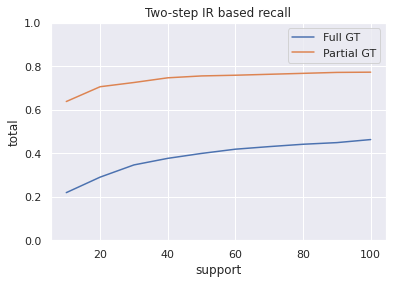

In [27]:
from matplotlib import pyplot as plt
import pandas as pd
# Make the results a data frame for seaborn
fr = pd.DataFrame({"support":support, "partial":partial, "total":total})
import seaborn as sns

# fr.head()
sns.set_theme()
g = sns.lineplot(data=fr, x='support', y='total', label="Full GT")
sns.lineplot(data=fr, x='support', y='partial', label="Partial GT")
g.set_ylim(0, 1.)
g.legend()
g.set_title("Two-step IR based recall")